# Lecture 5: File I/O

### File I/O

Most material developed by Jennifer Barnes for Phys77, Spring '16

## Announcements

* Office hours this week: Monday 10 - 11 am
* Office hours next week: Thursday 11:30 am - 12:30 pm
My office is 425 Old LeConte

* Don't forget to provide feedback about the course in the quizzes 
* Thanks for the excellent feedback about the statistics lecture. I won't address your questions today, but will come back to them next week when we have our second lecture on statistics
* Syllabus for the class has been updated
* Next week in class we'll discuss the final projects

## File I/O

In this notebook, we're going to explore some ways that we can store data in files, and extract data from files.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Part I: ASCII files

Think of ASCII files as text files. ASCII stands for American Standard Code for Information Interchange -- which developed standards for encoding text and control information in files as far back as 1967. These standards are still in use today. 

You can open them using a text editor (like vim or emacs in Unix, Notepad in Windows, or TextEdit on a Mac) and read the information they contain directly. There are a few ways to produce these files, and to read them once they've been produced. In Python, the simplest way is to use file objects. 

Let's give it a try. We create a file object by calling the function `open( filename, access_mode )` and assigning its return value to a variable (usually `f`). The argument `filename` just specifices the name of the file we're interested in, and `access_mode` tells Python what we plan to do with that file:  
    'r': read the file  
    'w': write to the file (creates a new file, or clears an existing file)
    'a': append the file  
     
Note that both arguments should be strings.
For full syntax and special arguments, see documentation at https://docs.python.org/2/library/functions.html#open

In [1]:
f = open( 'welcome.txt', 'w' )

A note of caution: as soon as you call `open()`, Python creates a new file with the name you pass to it. Python will overwrite existing files if you open a file of the same name in write ('`w`') mode.

Now we can write to the file using `f.write( thing_to_write )`. We can write anything we want, but it must be formatted as a string.

In [3]:
topics = ['Data types', 'Loops', 'Functions', 'Arrays', 'Plotting', 'Statistics']

In [4]:
f.write( 'Welcome to Physics 77, Spring 2020\n' ) # the newline command \n tells Python to start a new line
f.write( 'Topics we will learn about include:\n' )
for top in topics:
    f.write( top + '\n')
f.close()                                         # don't forget this part!
%cat welcome.txt

Welcome to Physics 77, Spring 2020
Topics we will learn about include:
Data types
Loops
Functions
Arrays
Plotting
Statistics


We can then read the data back out again (notice that this time we open it in read only mode);

In [7]:
f = open( 'welcome.txt', 'r' )
for line in f:
    #print(line)
    print(line.strip())
f.close()

Welcome to Physics 77, Spring 2020
Topics we will learn about include:
Data types
Loops
Functions
Arrays
Plotting
Statistics


There are also shortcuts available, if we only want to read in some of the data:

In [8]:
f = open( 'welcome.txt', 'r' )
f.readline()
f.readline() # skip the first two lines
topicList = [line.strip() for line in f]
#topicList = [line for line in f]
f.close()
print (len(topicList))
print (topicList)

6
['Data types', 'Loops', 'Functions', 'Arrays', 'Plotting', 'Statistics']


Python reads in spacing commands from files as well as strings. The `.strip()` just tells Python to ignore those spacing commands. What happens if you remove it from the code above?

#### Numerical data

For the most part, our text files will contain numeric information, not strings. These can be somewhat trickier to read in. Let's read in a file produced in another program, that contains results from a BaBar experiment, where we searched for a "dark photon" produced in e+e- collisions. The data are presented in two columns: 
  mass charge
  
First, let's peek into the file using iPython magic (direct interface to Unix operating system):

In [9]:
%cat BaBar_2016.dat   

0.001 0.000952195
0.01 0.000952195
0.1 0.000950897
0.18 0.000950809
0.26 0.000951735
0.34 0.000953462
0.42 0.000955598
0.5 0.000958435
0.6 0.000963399
0.7 0.00096678
0.8 0.000970583
0.9 0.000969781
1 0.000971594
1.1 0.000972387
1.2 0.000973097
1.3 0.000974733
1.4 0.00097422
1.5 0.00097165
1.6 0.000962064
1.7 0.000942872
1.8 0.000911077
1.9 0.000865801
2 0.000826349
2.1 0.000783788
2.2 0.000753597
2.3 0.000726955
2.35 0.000716662
2.4 0.000709861
2.45 0.000706955
2.5 0.000707445
2.55 0.000710584
2.6 0.000715213
2.65 0.000720283
2.7 0.00072533
2.75 0.000731263
2.8 0.000735299
2.85 0.000738478
2.9 0.000741726
2.95 0.000745896
3 0.000751421
3.05 0.000760788
3.1 0.000772545
3.15 0.000780816
3.2 0.000785241
3.25 0.000784907
3.3 0.000779522
3.35 0.000769029
3.4 0.000753078
3.45 0.000732364
3.5 0.000713674
3.55 0.000686495
3.6 0.000650987
3.65 0.000627128
3.7 0.000599517
3.75 0.000562417
3.8 0.00054204
3.85 0.000522112
3.9 0.000502032
3.95 0.000480773
4 0.000457639
4.05 0.00044199
4.1 0.0004378

Now let's read the file into python data structures

In [10]:
f = open('BaBar_2016.dat', 'r')
# read each line, split the data wherever there's a blank space,
# and convert the values to floats
mass = []
charge = []
for line in f:
    m, c = [float(dat) for dat in line.split()]
    mass.append(m)
    charge.append(c)
f.close()

We got it; let's plot it!

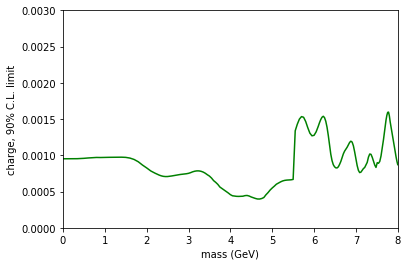

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mass, charge, 'g-' )
plt.xlim(0, 8)
plt.ylim(0, 3e-3)
plt.xlabel('mass (GeV)')
plt.ylabel('charge, 90% C.L. limit')
plt.show()

If only there were an easier way!

Fortunately, Python's `numpy` library has functions for converting file information into numpy arrays, which can be easily analyzed and plotted. The above can be accomplished with a lot less code (and a lot less head scratching!)

The `genfromtxt` function takes as it's argument the name of the file you want to load, and any optional arguments you want to add to help with the loading and formatting process. Some of the most useful optional arguments are:  

  **dtype**: data type of the resulting array  
  **comments**: the character that indicates the start of a comment (e.g. '#')  
              lines following  these characters will be ignored, and not read into the array  
  **delimiter**: the character used to separate values. Often, it's whitespace,   
   but it could also be ',', '|', or others  
  **skip_header**: how many lines to skip at the beginning of the file  
  **skip_footer**: how many lines to skip at the end of the file  
  **use_cols**: which columns to load and which to ignore  
  **unpack**: If True (the default is False), the array is transposed 
    (i.e., you can a set of columns, not a set of rows.) You can accomplish the same thing with `genfromtxt( file, opt_args,...).T`

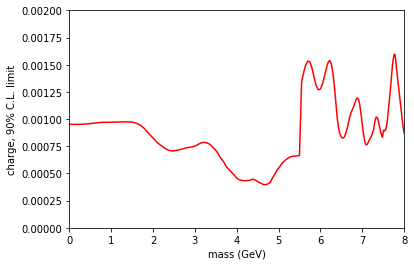

In [14]:
import numpy as np
mass, charge = np.loadtxt('BaBar_2016.dat', unpack = True)
plt.plot(mass, charge,'r-')
plt.xlim(0, 8)
plt.ylim(0, 2e-3)
plt.xlabel('mass (GeV)')
plt.ylabel('charge, 90% C.L. limit')
plt.show()

### Part II: CSV

CSV stands for Comma Separated Values. Python's `csv` module allows easy reading and writing of sequences. CSV is especially useful for loading data from spreadsheets and databases.

Let's make a list and write a file!  
First, we load the module

In [15]:
import csv

Next, we create a file object that opens the file we want to write to.  
Then, we create a *csv writer*, a special object that is built specifically to write
sequences to our csv file.

In [17]:
f_csv = open( 'nationData.csv', 'w' )
SAWriter = csv.writer( f_csv,                 # write to this file object
                           delimiter = ',',          # place comma between items we write
                           quotechar = '',           # Don't place quotes around strings
                           quoting = csv.QUOTE_NONE )# made up of multiple words 

Now let's write some data:

In [19]:
countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana',\
             'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
capitals = ['Buenos Aires', 'Sucre', 'Brasilia', 'Santiago', 'Bogota', 'Quito', 'Georgetown',\
             'Asuncion', 'Lima', 'Paramaribo', 'Montevideo', 'Caracas']
population_mils = [ 42.8, 10.1, 203.4, 16.9, 46.4, 15.0, 0.7, 6.5, 29.2, 0.5,\
                      3.3, 27.6]

In [20]:
SAWriter.writerow(['Data on South American Nations'])
SAWriter.writerow(['Country', 'Capital', 'Populaton (millions)'])
for i in range(len(countries)):
    SAWriter.writerow( [countries[i], capitals[i], population_mils[i]] )
f_csv.close()

Now let's see if we can open your file using a spreadsheet program, like MS Excel. How did we do?

We can use a similar process to read data into Python from a csv file. Let's read in a list of the most populous cities and store them for analysis.

In [22]:
cities = []
cityPops = []
metroPops = []

In [23]:
f_csv = open( 'cities.csv', 'r')
readCity = csv.reader( f_csv, delimiter = ',' )
next(readCity) # skip the header row
for row in readCity:
    print (', '.join(row)) # join the element of the list together, with the string ',' in between
    city_country = ', '.join(row[0:2])
    cities.append(city_country)
    if row[2] != '':
        cityPops.append( float(row[2]) )
    else: cityPops.append(-1)
    if row[3] != '':
        metroPops.append( float(row[3]) )
    else: metroPops.append(-1)
f_csv.close()

Shanghai, China, 24.3, 24.8
Lagos, Nigeria, 21.3, 21
Delhi, India, 16.8, 21.8
Istanbul, Turkey, 14.4, 14.4
Tokyo, Japan, 13.3, 36.9
Mumbai, India, 12.5, 20.7
Sao Paulo, Brazil, 11.9, 20.9
Beijing, China, 21.5, 21.1
Shenzhen, China, 10.8, 10.6
Seoul, South Korea, 10.3, 25.6
Jakarta, Indonesia, 10, 10.1
Guangzhou, China, 9.9, 23.9
Mexico City, Mexico, 8.9, 21.2
Lima, Peru, 8.7, 9.9
London, United Kingdom, 8.5, 14
New York City, United States, 8.5, 20.1
Bengaluru, India, 8.4, 8.7
Bangkok, Thailand, 8.3, 8.3


In [25]:
metroPops, cityPops = np.array(metroPops), np.array(cityPops)
cIds = np.argsort(cityPops)[::-1] # sort in descending order
mIds= np.argsort(metroPops)[::-1]

print ("The five most populous cities (within city proper) are:\n")
for j in range(5):
        print (cities[cIds[j]], "with a population of {} million".format(cityPops[cIds[j]]))

print ("\nThe five most populous metropolitan regions in the world are:\n")
for i in range(5):
        print (cities[mIds[i]], "with a metro population of {} million".format(metroPops[mIds[i]]))


The five most populous cities (within city proper) are:

Shanghai, China with a population of 24.3 million
Beijing, China with a population of 21.5 million
Lagos, Nigeria with a population of 21.3 million
Delhi, India with a population of 16.8 million
Istanbul, Turkey with a population of 14.4 million

The five most populous metropolitan regions in the world are:

Tokyo, Japan with a metro population of 36.9 million
Seoul, South Korea with a metro population of 25.6 million
Shanghai, China with a metro population of 24.8 million
Guangzhou, China with a metro population of 23.9 million
Delhi, India with a metro population of 21.8 million


### Binary files

So far, we've been dealing with text files. If you opened these files up with a text editor, you could see what was written in them. Binary files are different. They're written in a form that Python (and other languages) understand how to read, but we can't access them directly.  The most common binary file you'll encounter in python is a *.npy* file, which stores numpy arrays. You can create these files using the command `np.save( filename, arr )`. That command will store the array `arr` as a file called filename, which should have the extension .npy. We can then reload the data with the command `np.load(filename)`

In [36]:
x = np.linspace(-1.0, 1.0, 100)
y = np.sin(10*x)*np.exp(-x) - x
xy = np.hstack((x,y))

In [37]:
# save the array
np.save('y_of_x.npy', xy )

In [38]:
x = np.array

Let's also save it as ascii:

In [39]:
f = open('y_of_x.txt','w')
for var in xy:
    f.write('{0:f}\n'.format(var))
f.close()

In [40]:
del x, y, xy # erase these variables from Python's memory

Now reload the data and check that you can use it just as before.

200
100 100


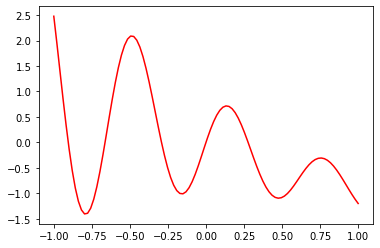

In [41]:
xy = np.load('y_of_x.npy')
print (len(xy))
x = xy[:100]
y = xy[100:]
print (len(x),len(y))

plt.plot(x,y,'r-')

### HDF5 Files

HDF5 files are well-suited for managing large amounts of complex data. Python can read them using the module `h5py.`

In [45]:
import h5py

Let's load our first hdf5 file:

In [46]:
fh5 = h5py.File( 'solar.h5py', 'r' )

hdf5 files are made up of data sets. Each data set has a name, or a key. Let's take a look at our data sets:

In [47]:
for k in fh5.keys(): # loop through the keys
    print (k)

TOrbit_yr
density
mass_earthM
names
solar_AU
surfT_K


It turns out that in our case, we access the data sets in our file by name:

In [49]:
for nm in fh5["names"]: # make sure to include the quotation marks!
    print (nm)

b'Mercury'
b'Venus'
b'Earth'
b'Mars'
b'Jupiter'
b'Saturn'
b'Uranus'
b'Neptune'


It looks like we've got some planet data on our hands!  
Names is a special case, in that it's elements are strings. The other data sets contain float values, and can be treated like numpy arrays.

In [64]:
print (fh5["solar_AU"][::2])
print (fh5["surfT_K"][fh5["names"]=='Earth'])

[ 0.38709894  1.0000001   5.203363   19.191263  ]
440.0


Let's make a plot of the solar system that shows each planet's:  
* distance from the sun (position on the x-axis)
* orbital period (position on the y-axis)
* mass (size of scatter plot marker)
* surface temperature (color of marker)
* density (transparency (or alpha, in matplotlib language))


Note that alpha ranges from 0 (transparent) to 1 (opaque)

In [65]:
distAU = fh5["solar_AU"][:]
mass = fh5["mass_earthM"][:]
torb = fh5["TOrbit_yr"][:]
temp = fh5["surfT_K"][:]
rho = fh5["density"][:]
names = fh5["names"][:]

In [70]:
import numpy as np

def get_size( ms ):
    m = 400.0/(np.max(mass) - np.min(mass))
    return 100.0 + (ms - np.min(mass))*m 
def get_alpha( p ):
    m = .9/(np.max(rho)-np.min(rho))
    return .1+(p - np.min(rho))*m

In [69]:
alfs = get_alpha(rho)

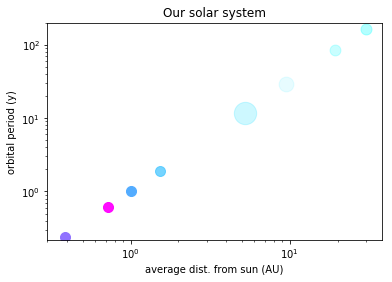

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt

norm = mpl.colors.Normalize(vmin=np.min(temp), vmax=np.max(temp))
cmap = plt.cm.cool
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots(1)
for i in range(8):
    ax.scatter( distAU[i], torb[i], s = get_size(mass[i]), color = m.to_rgba(temp[i]), alpha=alfs[i] ) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(-5,200)
ax.set_ylabel( 'orbital period (y)' )
ax.set_xlabel( 'average dist. from sun (AU)' )
ax.set_title( 'Our solar system' )
plt.show()

If you ever want to write your own HDF5 file, you can open an h5py file object by calling:  

    fh5 = h5py.File('filename.h5py', 'w')  
    
Data sets are created with

    dset = fh5.create_dataset( "dset_name", (shape,))
    
The default data type is float.  
The values for the data set are then set with:  

    dset[...] = (  )  
    
where the parenthesis contain an array or similar data of the correct shape. After you've added all your data sets, close the file with  

    fh5.close()  
If you have extra time, try creating your own data set and read it back in to verify that you've done it correctly!

### Pandas

There are more sophisticated tools to store and process the data. We will look at Pandas example 